## 0b

In [189]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [190]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import re
import os


raw_data_path = Path("../data/cats_and_dogs")
test_path = raw_data_path/"test"/"test"
train_path = raw_data_path/"train"/"train"

In [191]:
train_list = list(train_path.iterdir())


In [192]:
images = np.random.choice(train_list, 10)
pattern = r"\b\w{3}\b"
labels = [re.findall(pattern, path.name)[0] for path in images]

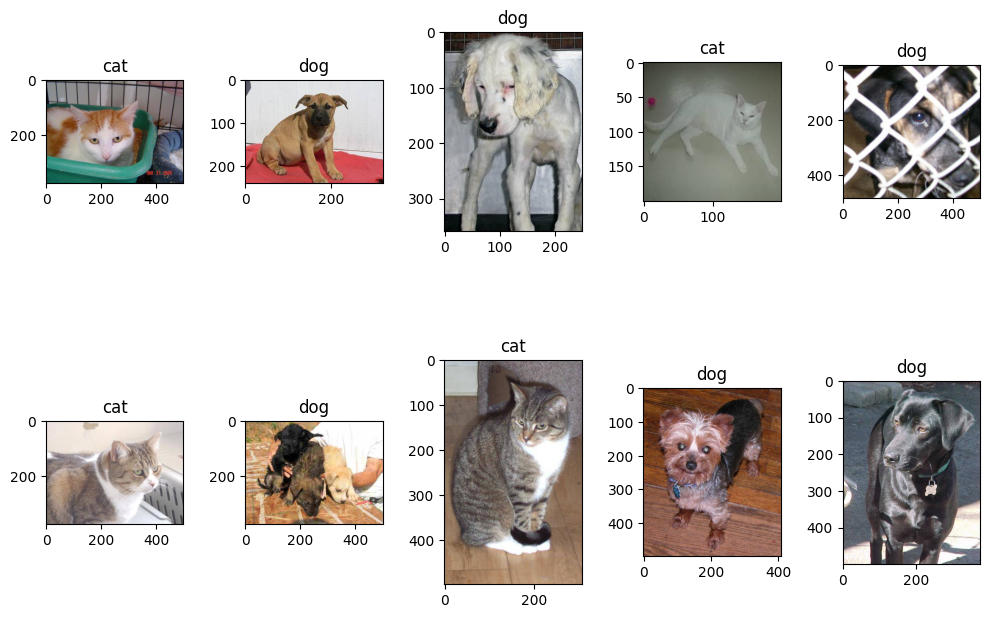

In [193]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))
for i, ax in enumerate(axes.flatten()):
    image= plt.imread(images[i])       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 0c

In [194]:
currentPath = Path("")
currentPath

WindowsPath('.')

In [195]:
#currentPath = Path("../data/cat_dog_filtered")


# Folders for small data
experimental_small_path= currentPath/"experiment_small_data"
experimental_small_path.mkdir(exist_ok=True)

experimental_small_test_path= experimental_small_path/"test"
experimental_small_test_path.mkdir(exist_ok=True)

experimental_small_train_path= experimental_small_path/"train"
experimental_small_train_path.mkdir(exist_ok=True)

experimental_small_val_path= experimental_small_path/"val"
experimental_small_val_path.mkdir(exist_ok=True)

# Folders for tiny data

experimental_tiny_path= currentPath/"experiment_tiny_data"
experimental_tiny_path.mkdir(exist_ok=True)

experimental_tiny_train_path= experimental_tiny_path/"train"
experimental_tiny_train_path.mkdir(exist_ok=True)

experimental_tiny_test_path= experimental_tiny_path/"test"
experimental_tiny_test_path.mkdir(exist_ok=True)

experimental_tiny_val_path= experimental_tiny_path/"val"
experimental_tiny_val_path.mkdir(exist_ok=True)

# Folders for original data

original_path = currentPath/"original_data"
original_path.mkdir(exist_ok=True)

original_test = original_path/"test"/"test"
original_test.mkdir(parents=True, exist_ok=True)

original_train = original_path/"train"/"train"
original_train.mkdir(parents=True, exist_ok=True)

In [196]:
import shutil
import stat
def clear_folder(folder_path):
    folder = Path(folder_path)
    for item in folder.iterdir():
        folder = Path(item)
        for test in folder.iterdir():
            #os.chmod(test, stat.S_IWRITE)

            if test.is_dir():
                shutil.rmtree(test)
            else:
                test.unlink()
                


In [197]:
clear_folder(experimental_small_path)
clear_folder(experimental_tiny_path)

## 0d

In [198]:
import random

def cat_dog(image_list:list, amount:int):
    total_dogs= [dog for dog in image_list if "dog" in dog.name]
    
    total_cats= [cat for cat in image_list if "cat" in cat.name]
    
    random_numbers = random.sample(range(7501), 2500)

    train_amount = int(0.32*amount)
    train = list()
    for i in range(train_amount):
        train.append(total_dogs[random_numbers[i]])
        train.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    val_amount = int(0.08*amount)
    val = list()
    for i in range(val_amount):
        val.append(total_dogs[random_numbers[i]])
        val.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    test_amount = int(0.1*amount)
    test = list()
    for i in range(test_amount):
        test.append(total_dogs[random_numbers[i]])
        test.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    #dog_train_amount = random_numbers[:0.32*amount]
    #cat_train_amount = random_numbers[0.32*amount:0.64*amount]
    
    #dog_val_amount = random_numbers[0.64*amount:0.72*amount]
    #cat_val_amount = random_numbers[0.72*amount*0.80*amount]
    
    #dog_test_amount = random_numbers[0.80*amount:0.90*amount]
    #cat_test_amount = random_numbers[0.90*amount:amount]
    
    return train, val, test
    
    

In [199]:
train_data_small, val_data_small, test_data_small = cat_dog(train_list, 2500)
train_data_tiny,val_data_tiny, test_data_tiny = cat_dog(train_list, 250)

In [200]:
import shutil
def image_copier(dest_path, dataset):
    if not os.listdir(dest_path):
        for path in dataset:
                shutil.copy(path, dest_path)
        
    else:
        print("The folder is not empty")


In [201]:
image_copier(experimental_small_test_path, test_data_small)
image_copier(experimental_small_train_path, train_data_small)
image_copier(experimental_small_val_path, val_data_small)

image_copier(experimental_tiny_test_path, test_data_tiny)
image_copier(experimental_tiny_train_path, train_data_tiny)
image_copier(experimental_tiny_val_path, val_data_tiny)

In [202]:
def labeler(data):
    labels = []
    images = []
    for path in data:    # setting labels 1 for dog, 0 for cat
        label = 1 if "dog" in path.name else 0
        labels.append(label)
        
        image = plt.imread(str(path))
        images.append(image)
    return images, np.array(labels)

## 0e

In [203]:
test_list_small = list(experimental_small_test_path.iterdir())
train_list_small = list(experimental_small_train_path.iterdir())
val_list_small = list(experimental_small_val_path.iterdir())

test_list_tiny = list(experimental_tiny_test_path.iterdir())
train_list_tiny = list(experimental_tiny_train_path.iterdir())
val_list_tiny = list(experimental_tiny_val_path.iterdir())

In [204]:
random.shuffle(test_list_small)
random.shuffle(train_list_small)
random.shuffle(val_list_small)
random.shuffle(test_list_tiny)
random.shuffle(train_list_tiny)
random.shuffle(val_list_tiny)
X_test_small, y_test_small = labeler(test_list_small)
X_test_tiny, y_test_tiny = labeler(test_list_tiny)
X_train_small, y_train_small = labeler(train_list_small)
X_train_tiny, y_train_tiny = labeler(train_list_tiny)
X_val_small, y_val_small = labeler(val_list_small)
X_val_tiny, y_val_tiny = labeler(val_list_tiny)

In [205]:
import pandas as pd
import seaborn as sns
def plot(images, labels):
    df = pd.DataFrame({"image": images, "label": labels})
    df["count"] = df["label"].sum()
    sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])

## Small list

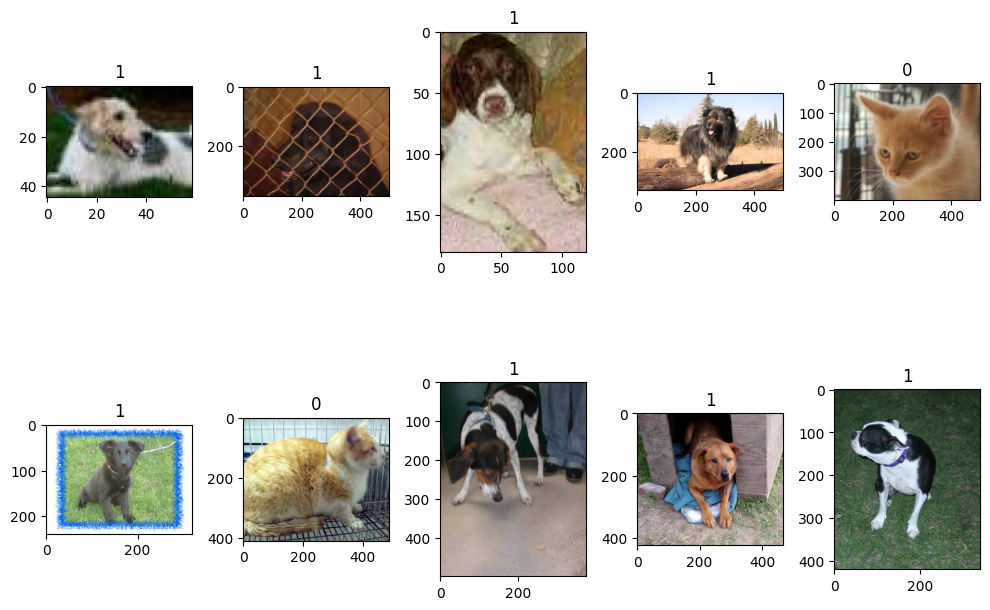

In [206]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  

C:\Users\hampu\AppData\Local\Temp\ipykernel_4292\3526214338.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




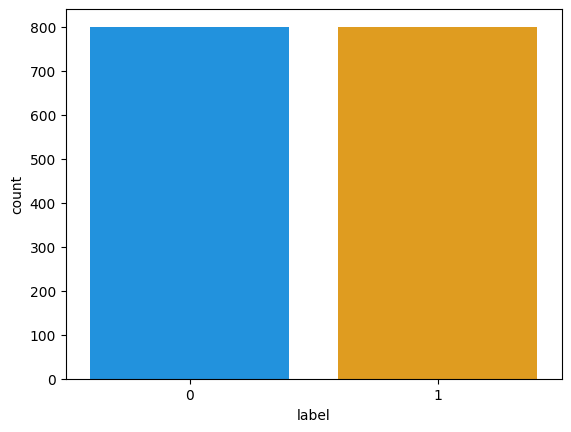

In [207]:
plot(X_train_small, y_train_small)

## Tiny list

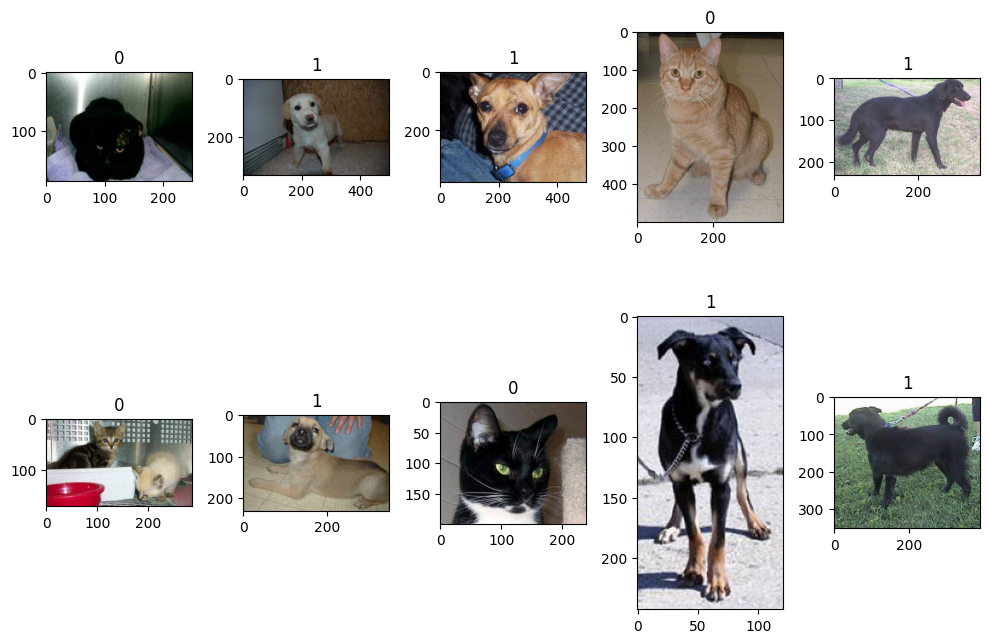

In [208]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_tiny[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_tiny[i])
    
fig.tight_layout()  

C:\Users\hampu\AppData\Local\Temp\ipykernel_4292\3526214338.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




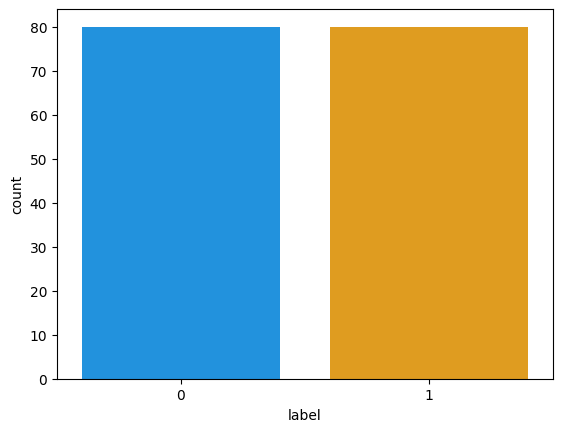

In [209]:
plot(X_train_tiny, y_train_tiny)

In [210]:
# Create a list with index for each dataset
import plotly.graph_objects as go
train_index = list(range(len(y_train_small)))

fig = go.Figure()

# Dataset
fig.add_trace(go.Scatter(x=train_index, y=y_train_small, mode='markers', name='Train'))


fig.update_layout(title='Dataset with index',
                  xaxis_title='Index',
                  yaxis_title='Label',
                  yaxis=dict(
                      tickvals=[0, 1],
                      ticktext=['Cat', 'Dog']
                  ))

fig.show()

## 1a

In [211]:
def image_size(data):
    image_sizes = []
    
    for image in data:
        image_size = image.shape[:2]
        image_sizes.append(image_size)
    return image_sizes

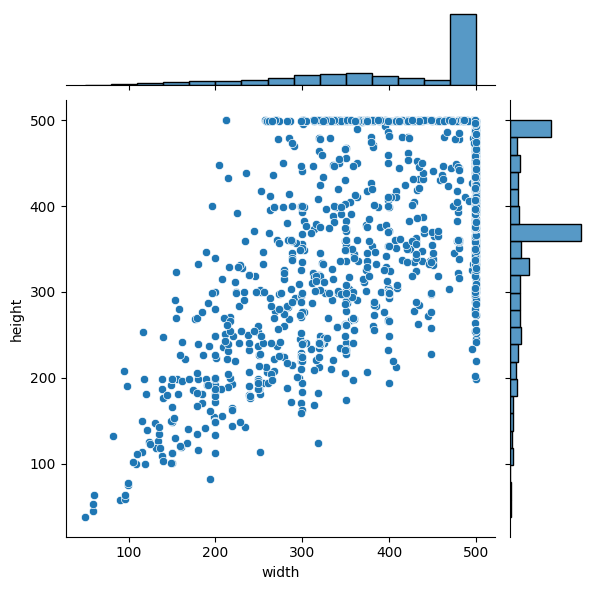

In [212]:
train_sizes_small = image_size(X_train_small)

df_train_sizes_small= pd.DataFrame( data= train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height")

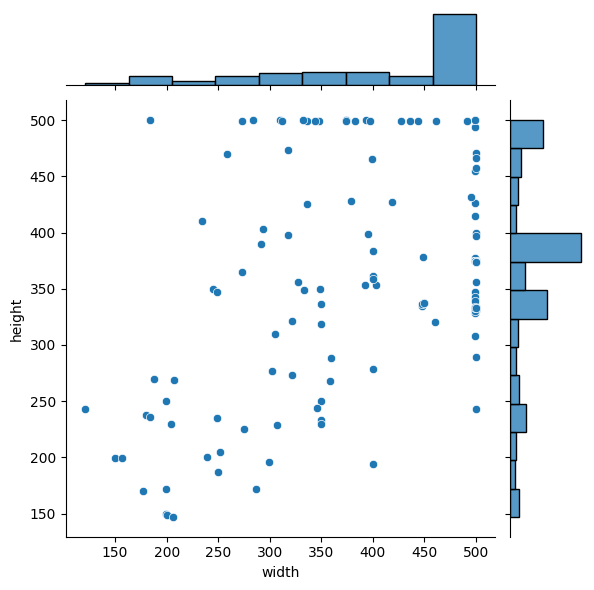

In [213]:
train_sizes_tiny = image_size(X_train_tiny)
df_train_sizes_tiny= pd.DataFrame( data= train_sizes_tiny, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_tiny, x = "width", y = "height")

## 1b

Removed smaller images to get rid of the most blurry ones

In [214]:
train_sizes_small
filtered_train_sizes_small = [size for size in train_sizes_small if size[0] >= 100 and size[1] >= 100]

print(filtered_train_sizes_small)

[(374, 500), (181, 120), (333, 499), (399, 500), (239, 320), (411, 488), (499, 375), (423, 468), (420, 341), (499, 344), (222, 213), (360, 271), (467, 350), (304, 399), (149, 150), (212, 408), (374, 500), (332, 499), (199, 200), (256, 360), (374, 500), (220, 299), (499, 500), (375, 499), (499, 396), (305, 500), (373, 314), (374, 500), (459, 399), (359, 480), (374, 500), (267, 356), (337, 500), (432, 435), (499, 500), (377, 499), (333, 499), (320, 319), (300, 199), (479, 319), (333, 499), (375, 390), (374, 500), (490, 499), (322, 312), (470, 291), (499, 403), (356, 300), (375, 499), (140, 168), (181, 157), (359, 478), (232, 399), (373, 500), (499, 398), (299, 350), (374, 500), (374, 500), (374, 499), (239, 320), (293, 500), (380, 499), (232, 239), (499, 486), (374, 500), (355, 449), (349, 302), (499, 476), (499, 344), (444, 471), (360, 287), (499, 286), (375, 499), (287, 352), (500, 437), (499, 402), (444, 480), (261, 350), (419, 432), (400, 399), (372, 500), (348, 499), (374, 500), (20

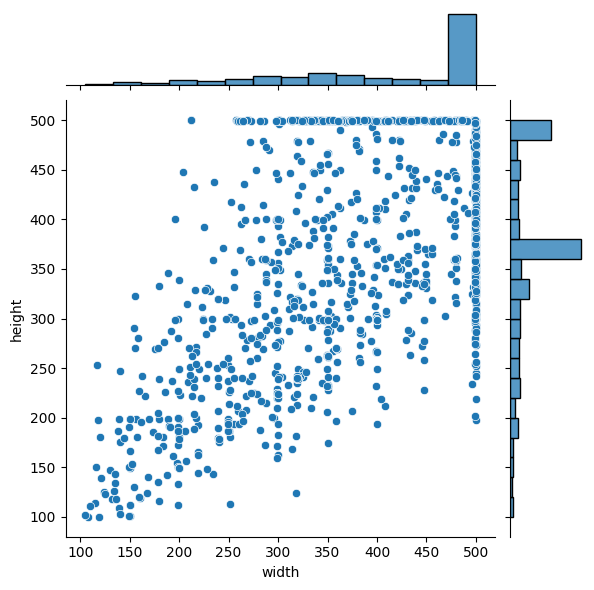

In [215]:

df_train_sizes_small= pd.DataFrame( data= filtered_train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height") # Plotting images based on resolution

In [216]:
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image resizer
def prep_images(data_path):
    image_files = list(data_path.glob('*.jpg'))
    labels = []
    images = []
    
    for file in image_files:
        img = cv2.imread(str(file))
        
        if img.shape[0] > 100 and img.shape[1] > 100: # Removing images that were very large made accuracy plummet
            # Changes image size to 200x200. 200x200 gave good enough results to keep
            img = cv2.resize(img, (200, 200))   
            images.append(img)
            label = 1 if 'dog' in file.stem else 0
            labels.append(label)
        
    combined = list(zip(images, labels)) # Help from chatgpt to shuffle without losing labels
    random.shuffle(combined)
    
    shuffled_images, shuffled_labels = zip(*combined)


    images = np.array(shuffled_images)
    labels = np.array(shuffled_labels)
    
    
    return images, labels


In [248]:
# Rezising all datasets
X_train_small, y_train_small = prep_images(experimental_small_train_path)
X_train_tiny, y_train_tiny = prep_images(experimental_tiny_train_path)
X_test_small, y_test_small = prep_images(experimental_small_test_path)
X_val_small, y_val_small = prep_images(experimental_small_val_path)




In [218]:
print(X_train_small.shape)
print(X_train_small[30].shape)
print(y_test_small)

(1585, 200, 200, 3)
(200, 200, 3)
[0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0
 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0

In [219]:
print(len(X_train_small))
print(len(y_train_small))

1585
1585


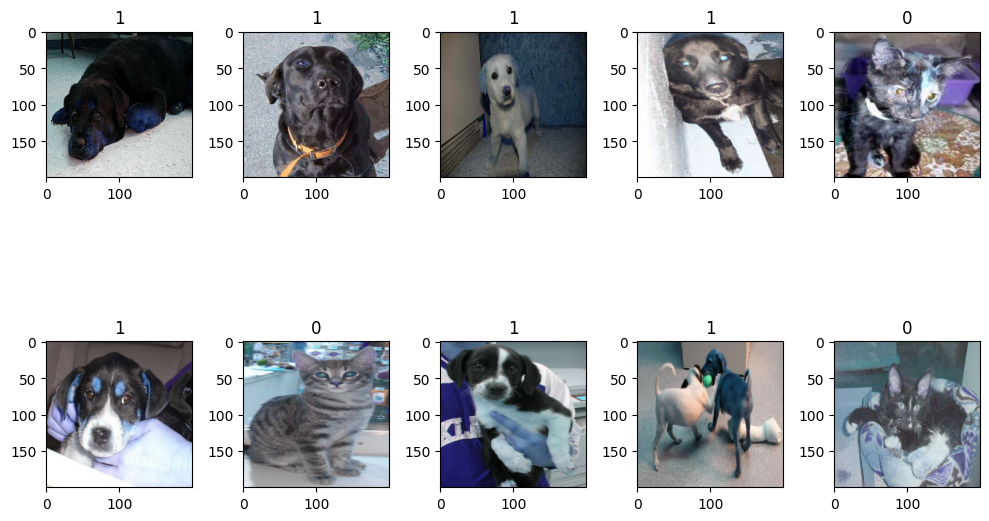

In [220]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  

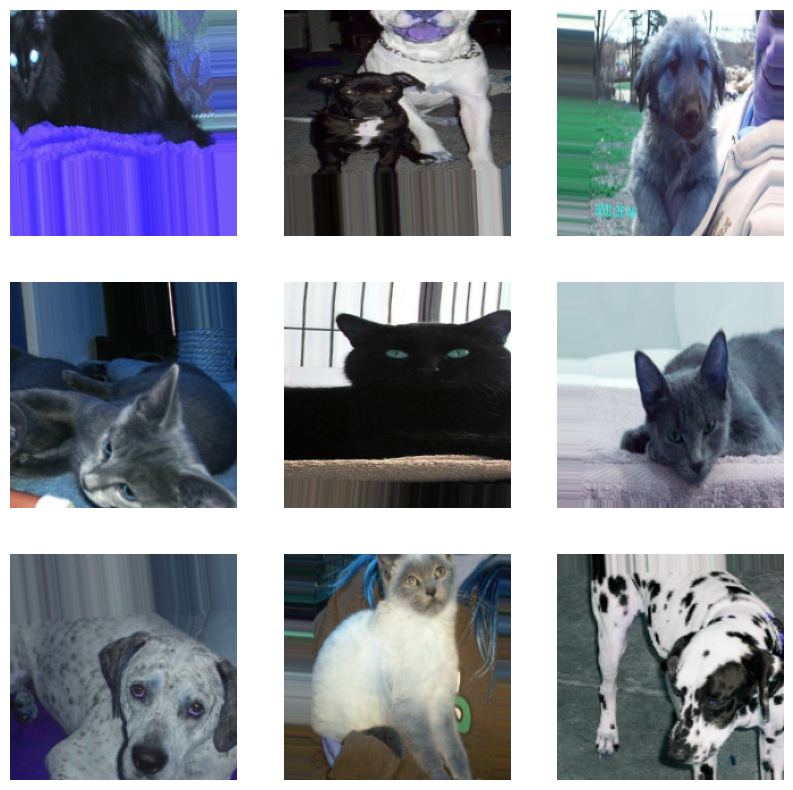

In [221]:
train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.25,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Creating an image generator for resized images
train_datagen.fit(X_train_small)

def visualize_augmented_images(datagen, images, num_images=9):
    plt.figure(figsize=(10, 10))
    for X_batch, _ in datagen.flow(images, np.zeros(len(images)), batch_size=num_images):
        for i in range(0, num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(X_batch[i].astype("uint8"))
            plt.axis('off')
        break
    plt.show()

visualize_augmented_images(train_datagen, X_train_small)

2a

Without augmentation

In [222]:
X_train_small[1].flatten().min(), X_train_small[1].flatten().max()

(0, 255)

In [223]:
X_train_small = X_train_small.astype('float32') / 255
X_test_small = X_test_small.astype('float32') / 255
X_val_small = X_val_small.astype('float32') / 255

In [224]:
from tensorflow.keras.callbacks import EarlyStopping
def cnn_model(learning_rate=0.001, dropout_rate=0.3, kernels=[32, 64, 128, 128]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name='CNN_model')

    # Adding layers 
    for kernel in kernels:
        model.add(Conv2D(kernel, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(200, 200, 3) if not model.layers else None))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # subsampling layer

    model.add(Flatten())  # flatten layer
    model.add(Dropout(dropout_rate))  # dropout layer
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))  # fully connected layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

    return model

In [225]:
model = cnn_model()
model.summary()

c:\Users\hampu\School\Artificial_Intelligence_Hampus_Erlandsson_OPA23\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,795,457 (25.92 MB)

 Trainable params: 6,795,457 (25.92 MB)

 Non-trainable params: 0 (0.00 B)

model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [226]:
print(len(X_val_small))
print(len(y_val_small))

398
398


In [227]:
history = model.fit(X_train_small, y_train_small, epochs=10, validation_data=(X_val_small, y_val_small), batch_size=32)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 675ms/step - acc: 0.5150 - loss: 2.1834 - val_acc: 0.6407 - val_loss: 0.6836
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 587ms/step - acc: 0.5688 - loss: 0.6753 - val_acc: 0.5503 - val_loss: 0.7233
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 778ms/step - acc: 0.5981 - loss: 0.6642 - val_acc: 0.5025 - val_loss: 0.8009
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 700ms/step - acc: 0.6213 - loss: 0.6422 - val_acc: 0.6256 - val_loss: 0.6631
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 830ms/step - acc: 0.6903 - loss: 0.6109 - val_acc: 0.6106 - val_loss: 0.6963
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 729ms/step - acc: 0.6924 - loss: 0.5612 - val_acc: 0.6432 - val_loss: 0.6906
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 694ms/step - acc: 0.7618 - loss: 0.4774 - val_acc: 0.6583 - val_loss: 0.6416
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 749ms/step - acc: 0.7843 - loss: 0.4295 - val_acc: 0.6382 - val_loss: 0.8232
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 840ms/

In [228]:
metrics = pd.DataFrame(history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.529338,1.129272,0.640703,0.683551
1,0.588013,0.662942,0.550251,0.723332
2,0.603786,0.655823,0.502513,0.800921
3,0.639117,0.634084,0.625628,0.663075
4,0.670662,0.606518,0.610553,0.696295


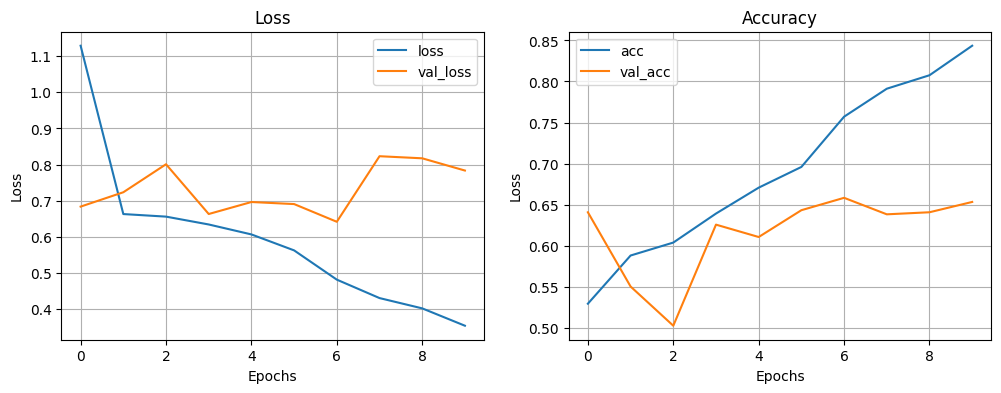

In [229]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


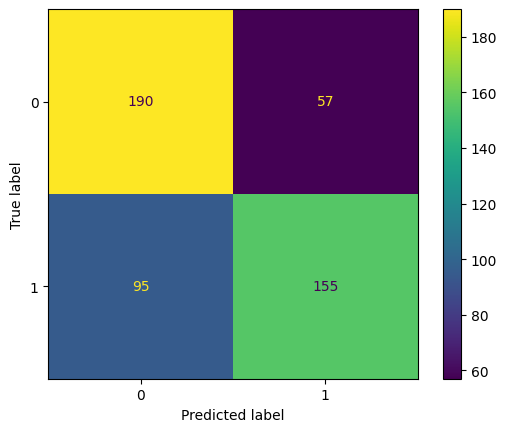

              precision    recall  f1-score   support

     Class 0       0.67      0.77      0.71       247
     Class 1       0.73      0.62      0.67       250

    accuracy                           0.69       497
   macro avg       0.70      0.69      0.69       497
weighted avg       0.70      0.69      0.69       497



In [230]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred_prob = model.predict(X_test_small)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Create classification report 
class_report = classification_report(y_test_small, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)

Med augmentering

In [231]:
train_generator = train_datagen.flow(X_train_small, y_train_small, batch_size=32)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Early stopper with low tolerence because low epochs
early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=4,
    verbose=1,
    restore_best_weights=True
)
# Training model with data augmentation
history.model.fit(
    train_generator,
    epochs=10,
    validation_data=(X_val_small, y_val_small),
    callbacks=[early_stopper]
)



Epoch 1/10


c:\Users\hampu\School\Artificial_Intelligence_Hampus_Erlandsson_OPA23\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 658ms/step - acc: 0.5980 - loss: 0.7812 - val_acc: 0.6357 - val_loss: 0.6246
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 885ms/step - acc: 0.6175 - loss: 0.6482 - val_acc: 0.7010 - val_loss: 0.5877
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 834ms/step - acc: 0.6610 - loss: 0.6408 - val_acc: 0.6935 - val_loss: 0.5734
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 811ms/step - acc: 0.6831 - loss: 0.6112 - val_acc: 0.7211 - val_loss: 0.5574
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 867ms/step - acc: 0.6742 - loss: 0.5985 - val_acc: 0.7211 - val_loss: 0.5424
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 48s 923ms/step - acc: 0.6679 - loss: 0.6167 - val_acc: 0.6960 - val_loss: 0.5996
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 752ms/step - acc: 0.6990 - loss: 0.5874 - val_acc: 0.6784 - val_loss: 0.5780
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 708ms/step - acc: 0.6986 - loss: 0.5837 - val_acc: 0.7010 - val_loss: 0.5860
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 765ms/step - acc:

In [232]:
metrics = pd.DataFrame(history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.529338,1.129272,0.640703,0.683551
1,0.588013,0.662942,0.550251,0.723332
2,0.603786,0.655823,0.502513,0.800921
3,0.639117,0.634084,0.625628,0.663075
4,0.670662,0.606518,0.610553,0.696295


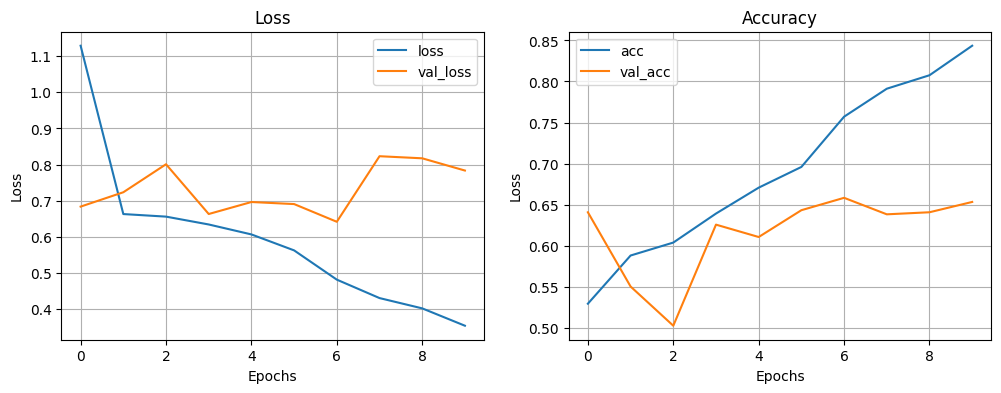

In [233]:
def plot_metrics(metrics): 
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step


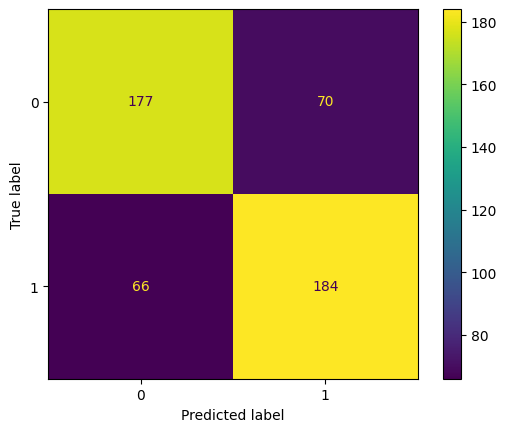

              precision    recall  f1-score   support

     Class 0       0.73      0.72      0.72       247
     Class 1       0.72      0.74      0.73       250

    accuracy                           0.73       497
   macro avg       0.73      0.73      0.73       497
weighted avg       0.73      0.73      0.73       497



In [234]:
y_pred_prob = model.predict(X_test_small)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Create classification report 
class_report = classification_report(y_test_small, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)

## 2c

Redan gjorde det åvan för båda modellerna

Resulataten hade kunnat var bättre med andra parametrar i image gen och annat antal epochs, men jag har slut på tid att testa

## 2d

In [239]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze wieghts of the Xception base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

# Compile Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

model.summary()






Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [241]:
history = model.fit(X_train_small, y_train_small, epochs=10, validation_data=(X_val_small, y_val_small))


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.8799 - loss: 0.2360 - val_accuracy: 0.9774 - val_loss: 0.0759
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9775 - loss: 0.0670 - val_accuracy: 0.9799 - val_loss: 0.0476
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9763 - loss: 0.0585 - val_accuracy: 0.9824 - val_loss: 0.0520
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9808 - loss: 0.0563 - val_accuracy: 0.9799 - val_loss: 0.0497
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9859 - loss: 0.0382 - val_accuracy: 0.9824 - val_loss: 0.0554
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9812 - loss: 0.0435 - val_accuracy: 0.9824 - val_loss: 0.0472
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9847 - loss: 0.0519 - val_accuracy: 0.9849 - val_loss: 0.0517
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9867 - loss: 0.0314 - val_accuracy: 0.9849 - v

In [243]:

metrics = pd.DataFrame(history.history)
test_loss, test_accuracy = model.evaluate(X_test_small, y_test_small)
print(f"Test Accuracy: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9662 - loss: 0.0798
Test Accuracy: 0.9657947421073914


In [245]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.939432,0.147498,0.977387,0.075945
1,0.972871,0.082095,0.979900,0.047608
2,0.978549,0.060722,0.982412,0.052004
3,0.983596,0.048734,0.979900,0.049707
4,0.984858,0.048097,0.982412,0.055397


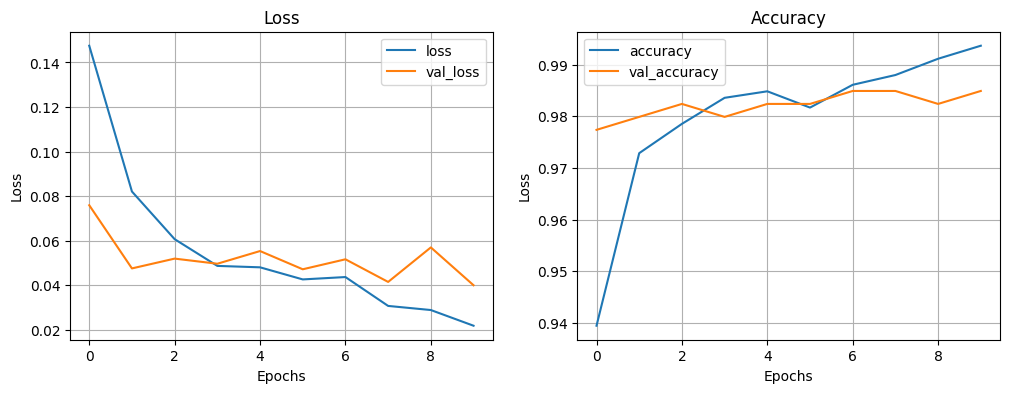

In [246]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step


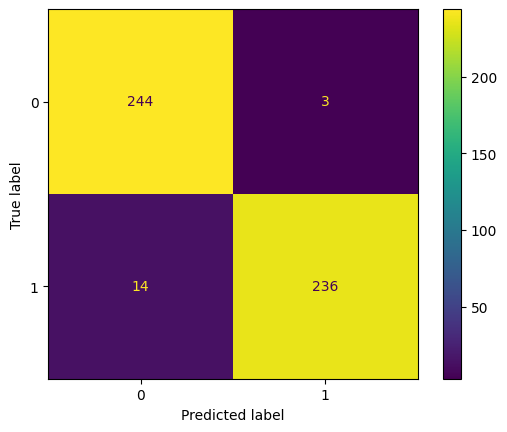

              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97       247
     Class 1       0.99      0.94      0.97       250

    accuracy                           0.97       497
   macro avg       0.97      0.97      0.97       497
weighted avg       0.97      0.97      0.97       497



In [247]:
y_pred_prob = model.predict(X_test_small)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Create classification report 
class_report = classification_report(y_test_small, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)